In [526]:
import pandas as pd
import numpy as np


In [527]:
df = pd.read_csv('traincaixa.csv')

In [528]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1,1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1
2,1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1
3,1994-01-06,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1
...,...,...,...,...,...,...,...,...
6549,2019-05-24,9150.299805,9211.099609,9141.400391,9174.599609,9174.599609,121673100.0,0
6550,2019-05-27,9225.900391,9294.599609,9204.700195,9216.400391,9216.400391,60178000.0,0
6551,2019-05-28,9220.400391,9224.900391,9132.900391,9191.799805,9191.799805,218900800.0,0
6552,2019-05-29,9113.200195,9116.700195,9035.099609,9080.500000,9080.500000,148987100.0,0


In [529]:
df.dropna(inplace = True)

In [530]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

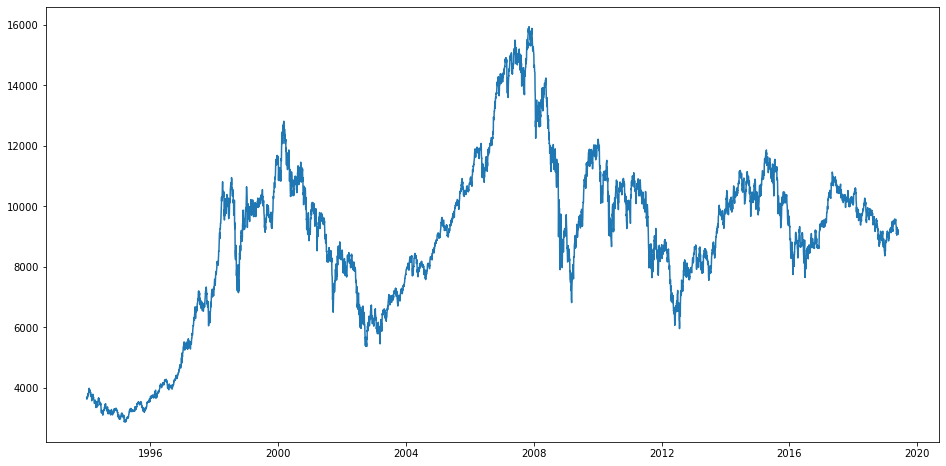

In [531]:
import matplotlib.pyplot as plt
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history');

In [532]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [533]:
# splitting into train and validation
train = new_data[:3210]
valid = new_data[3210:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-2000+i:].sum() + sum(preds)
    b = a/2000
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 Shape of training set:
(3210, 2)

 Shape of validation set:
(3211, 2)

 RMSE value on validation set:
3196.864143266824


<ipython-input-534-f99b955e616c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-534-f99b955e616c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


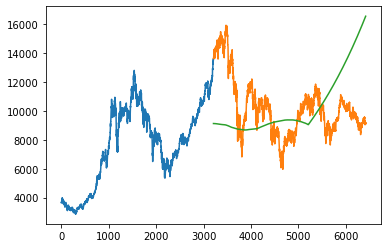

In [534]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']]);

In [535]:
#ARIMA
from pmdarima import auto_arima

data = df.sort_index(ascending=True, axis=0)

train = data[:3210]
valid = data[3210:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=3211)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.87 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=41191.296, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=40235.241, Time=0.79 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=41190.468, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=39920.696, Time=1.50 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.94 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.85 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=39922.853, Time=1.11 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=39913.230, Time=2.20 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=40228.305, Time=1.24 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=9.02 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=4.86 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=39914.161, Time=2.75 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AI

In [536]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast)),2)))
rms

77876.72141748627

In [537]:
# LSTM
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM



In [538]:
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:3210,:]
valid = dataset[3210:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(3,len(train)):
    x_train.append(scaled_data[i-3:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting  values, using past 3 from the train data
inputs = new_data[len(new_data) - len(valid) - 3:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(3,inputs.shape[0]):
    X_test.append(inputs[i-3:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

3207/3207 - 4s - loss: 0.0012


In [539]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

227.74252566255404

<ipython-input-540-fbae56a5d54e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


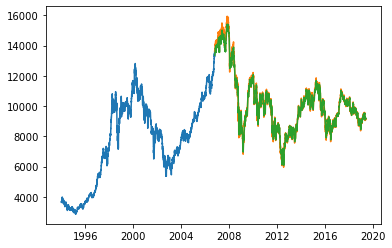

In [540]:
#for plotting
train = new_data[:3210]
valid = new_data[3210:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']]);

In [541]:
df_test = pd.read_csv('caixatest.csv')

In [542]:
df_test['Date'] = pd.to_datetime(df_test.Date,format='%Y-%m-%d')

In [543]:
df_test.index = df_test['Date']

In [544]:
new_data2 = pd.DataFrame(index=range(0,len(df_test)),columns=['Date', 'Close'])
for i in range(0,len(df_test)):
    new_data2['Date'][i] = df_test['Date'][i]
    new_data2['Close'][i] = df_test['Close'][i]

In [545]:
new_data2.index = new_data2['Date']

In [546]:
new_data2 = new_data2.drop(columns='Date')

In [547]:
dataset2 = new_data2.values

In [548]:
scaler2 = MinMaxScaler(feature_range=(0, 1))
scaled_data2 = scaler.fit_transform(dataset2)

In [549]:
X_test2 = []
X_test3 = []
for i in range(3,scaled_data2.shape[0]):
    X_test2.append(scaled_data2[i-3:i,0])
X_test2 = np.array(X_test2)
X_test2 = np.reshape(X_test2, (X_test2.shape[0],X_test2.shape[1],1))

In [550]:
predict_price = model.predict(X_test2)
closing_price_pred = scaler.inverse_transform(predict_price)

In [551]:
X_test.shape

(3211, 3, 1)

In [552]:
new_data2 = new_data2[:723]

In [553]:
new_data2['closing_price_pred'] = closing_price_pred

In [554]:
new_data2

,Close,closing_price_pred
Date,,
2019-06-05,9150.5,9121.602539
2019-06-06,9169.200195,9160.894531
2019-06-07,9236.099609,9206.299805
2019-06-10,9294.099609,9220.372070
2019-06-11,9282.099609,9202.987305
...,...,...
2022-03-22,8487.200195,8387.897461
2022-03-23,8328.400391,8311.797852
2022-03-24,8305.099609,8315.748047


In [555]:
new_data2['Close'] = new_data2['Close'].astype(float)
new_data2['closing_price_pred'] = new_data2['closing_price_pred'].astype(float)

In [556]:
new_data2['Varianza'] = new_data2['closing_price_pred'] - new_data2['Close']

In [557]:
new_data2['Target']= new_data2['Varianza'].apply(target)

In [558]:
def target(x):
    if x > 0:
        return 1
    
    else:
        return 0 

In [559]:
new_data2.drop(columns=['Close','closing_price_pred','target','Varianza'])

KeyError: "['target'] not found in axis"

In [ ]:
new_data2['test_index'] = df_test[:723]['test_index'].values

In [ ]:
submission = new_data2.drop(columns=['Close','closing_price_pred','target','Varianza']).reset_index().drop('Date',axis = 1)

In [ ]:
submission.rename(columns = {'test_index':'Target', 'Target':'test_index'}, inplace = True)

In [ ]:
submission = submission[['test_index','Target']]

In [ ]:
submission.to_csv('predictions.csv',index = False)



In [646]:
submission.to_json('predictions.json')

In [ ]:
#TWEETS

In [560]:
df_tweets = pd.read_csv('tweets.csv')

In [562]:
# utilities

import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [563]:
df_tweets

,tweetDate,handle,text
0,Sat Apr 09 14:47:45 +0000 2022,abelac62,He hecho el repaso de todos los componentes de...
1,Thu Apr 07 19:14:36 +0000 2022,LluisPerarnau,Els projectes que han presentat les empreses d...
2,Mon Apr 04 16:48:45 +0000 2022,Pegaso121080,"Por si no lo has visto, o no lo encuentras en ..."
3,Tue Apr 05 07:23:16 +0000 2022,zonavalue,📈 #BOLSA: El #Ibex35 abre en 🟢 \n\n🇪🇸 #Ibex35 ...
4,Thu Mar 31 16:07:43 +0000 2022,EPeconomia,"El #Ibex35 retrocede un 0,4% en marzo y un 3,0..."
...,...,...,...
9796,Thu Jan 08 16:41:36 +0000 2015,elEconomistaes,"#Cierre | El #Ibex35 sube un 2,26% hasta los 1..."
9797,Sat Jan 03 17:20:30 +0000 2015,Roger_bolsa,Un vistazo a los #Bluechips del #Ibex #Ibex35....
9798,Sat Jan 10 19:42:45 +0000 2015,Secretosdebolsa,Así comienza la #Bolsa en #2015 Ojo a los sopo...
9799,Sat Jan 10 21:47:17 +0000 2015,Roger_bolsa,Análisis del #BancoSantander #Santander #SAN t...


In [564]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweetDate  9799 non-null   object
 1   handle     9798 non-null   object
 2   text       9797 non-null   object
dtypes: object(3)
memory usage: 229.8+ KB


In [565]:
df_tweets.dropna(inplace = True)

In [566]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword_es = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [567]:
STOPWORDS = set(stopword_es)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
try:
    df_tweets['text'] = df_tweets['text'].apply(lambda text: cleaning_stopwords(text))
    df_tweets['text'].head()
except:
    'none'

In [568]:
df_tweets['text'].head()

0    He hecho repaso componentes #IBEX35 ahora pong...
1    Els projectes presentat empreses #Ibex35 als f...
2    Por si visto, encuentras búsquedas suele pasar...
3    📈 #BOLSA: El #Ibex35 abre 🟢 🇪🇸 #Ibex35 🔼 +0,10...
4    El #Ibex35 retrocede 0,4% marzo 3,08% primer t...
Name: text, dtype: object

In [569]:
#Limpieza texto

import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
try:
    df_tweets['text']= df_tweets['text'].apply(lambda x: cleaning_punctuations(x))
    df_tweets['text'].tail()
except:
    'none'

In [583]:
df_tweets['text'].head()

0    He hecho repaso componentes IBEX ahora pongo L...
1    Els projectes presentat empreses Ibex als fons...
2    Por si visto encuentras búsquedas suele pasar ...
3    📈 BOLSA El Ibex abre 🟢 🇪🇸 Ibex 🔼   puntos Mayo...
4    El Ibex retrocede  marzo  primer trimestre  ht...
Name: text, dtype: object

In [582]:
#caracteres repetidos
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df_tweets['text'] = df_tweets['text'].apply(lambda x: cleaning_repeating_char(x))
df_tweets['text'].head()

0    He hecho repaso componentes IBEX ahora pongo L...
1    Els projectes presentat empreses Ibex als fons...
2    Por si visto encuentras búsquedas suele pasar ...
3    📈 BOLSA El Ibex abre 🟢 🇪🇸 Ibex 🔼   puntos Mayo...
4    El Ibex retrocede  marzo  primer trimestre  ht...
Name: text, dtype: object

In [584]:
#quitando links
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df_tweets['text'] = df_tweets['text'].apply(lambda x: cleaning_URLs(x))
df_tweets['text'].head()

0    He hecho repaso componentes IBEX ahora pongo L...
1    Els projectes presentat empreses Ibex als fons...
2    Por si visto encuentras búsquedas suele pasar ...
3    📈 BOLSA El Ibex abre 🟢 🇪🇸 Ibex 🔼   puntos Mayo...
4    El Ibex retrocede  marzo  primer trimestre  ht...
Name: text, dtype: object

In [581]:
#quitando numeros 
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df_tweets['text'] = df_tweets['text'].apply(lambda x: cleaning_numbers(x))
df_tweets['text'].head()

0    He hecho repaso componentes IBEX ahora pongo L...
1    Els projectes presentat empreses Ibex als fons...
2    Por si visto encuentras búsquedas suele pasar ...
3    📈 BOLSA El Ibex abre 🟢 🇪🇸 Ibex 🔼   puntos Mayo...
4    El Ibex retrocede  marzo  primer trimestre  ht...
Name: text, dtype: object

In [575]:
from googletrans import Translator, constants

translator = Translator()

In [599]:
!pip install googletrans==4.0.0-rc1

In [622]:
#tokenizamos texto
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df_tweets['text'] = df_tweets['text'].apply(tokenizer.tokenize)
df_tweets['text'].head()


TypeError: expected string or bytes-like object

In [625]:
#aplicamos stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df_tweets['text']= df_tweets['text'].apply(lambda x: stemming_on_text(x))
df_tweets['text'].head()

0    [He, hecho, repaso, componentes, IBEX, ahora, ...
1    [Els, projectes, presentat, empreses, Ibex, al...
2    [Por, si, visto, encuentras, búsquedas, suele,...
3    [BOLSA, El, Ibex, abre, Ibex, puntos, Mayores,...
4    [El, Ibex, retrocede, marzo, primer, trimestre...
Name: text, dtype: object

In [629]:
#lematizador
import nltk
nltk.download('wordnet')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df_tweets['text'] = df_tweets['text'].apply(lambda x: lemmatizer_on_text(x))
df_tweets['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


0    [He, hecho, repaso, componentes, IBEX, ahora, ...
1    [Els, projectes, presentat, empreses, Ibex, al...
2    [Por, si, visto, encuentras, búsquedas, suele,...
3    [BOLSA, El, Ibex, abre, Ibex, puntos, Mayores,...
4    [El, Ibex, retrocede, marzo, primer, trimestre...
Name: text, dtype: object

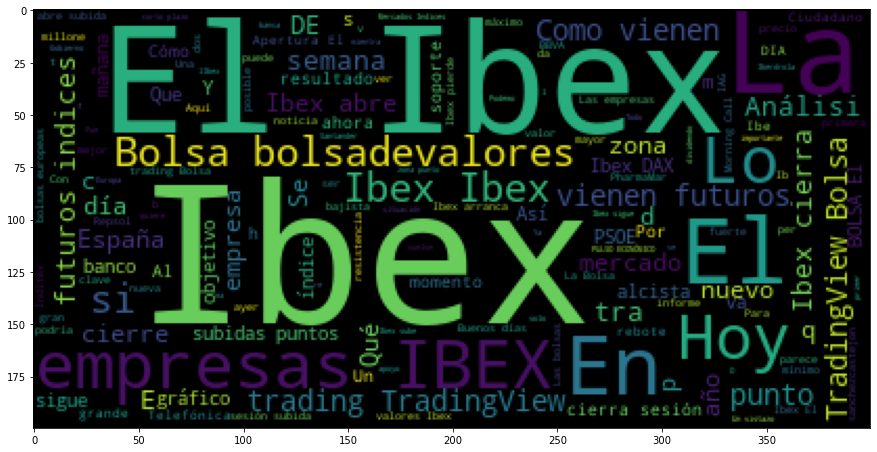

In [643]:
#wordcloud
text = WordCloud().generate(df_tweets['text'].to_string())
plt.figure(figsize=(15,15))
plt.imshow(text)


In [ ]:
#Supongo que habria que etiquetar tweets en funcion del sentimiento del mismo y fusionar el modelo predictor con un modelo de analisis de sentimiento de los tweets, asi como noticias, etc para producir un modelo mas completo 